In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
cat_data = pd.read_csv('./data/categorical_features.csv', low_memory=False, dtype=int)
cat_data = cat_data.drop('Unnamed: 0', axis=1)
cat_data['id'] = cat_data['id'].astype(int)

In [4]:
cat_data = cat_data.astype(bool)

In [5]:
cat_data.shape

(243721, 99)

In [6]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")

In [7]:
reviews_data.shape

(243721, 5)

In [8]:
# select random rows
import numpy as np

np.random.seed(1234)
sample_size=10000
idxs = np.random.randint(0, cat_data.shape[0], 20000)
idxs

array([224047, 189139, 165158, ..., 205819, 185192,  43586])

In [9]:
dependent_variable = 'review_scores_rating'

In [10]:
data = pd.concat([cat_data.loc[idxs], reviews_data.loc[idxs][[dependent_variable]]], axis=1)

In [11]:
data.sample(10)

,id,bed_type_airbed,bed_type_couch,bed_type_futon,bed_type_pull_out_sofa,bed_type_real_bed,room_type_entire_home_apt,room_type_private_room,room_type_shared_room,neighbourhood_cleansed_bayview,...,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_time_a_few_days_or_more,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,review_scores_rating
58893,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,60.0
17777,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,92.0
131454,True,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,NaN
114284,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,92.0
69425,True,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,100.0
243665,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,98.0
231852,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,True,False,95.0
120577,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,99.0
233360,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,NaN
239277,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,93.0


In [12]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

In [13]:
# Drop outliers from dependent variable
data = data.loc[data[dependent_variable] >= 80]

In [14]:
data.shape

(15170, 100)

bed_type_airbed


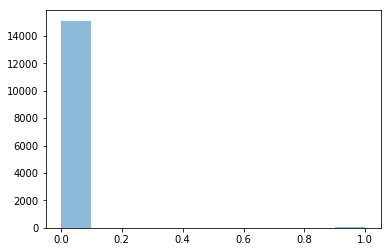

bed_type_couch


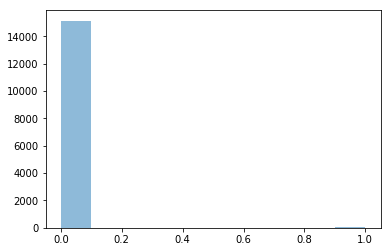

bed_type_futon


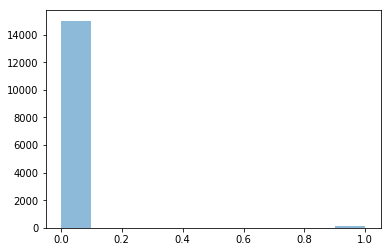

bed_type_pull_out_sofa


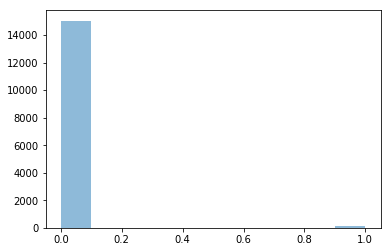

bed_type_real_bed


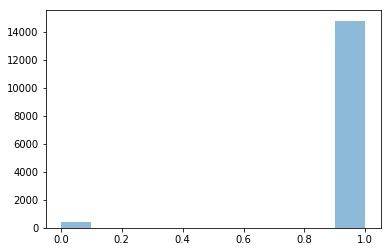

room_type_entire_home_apt


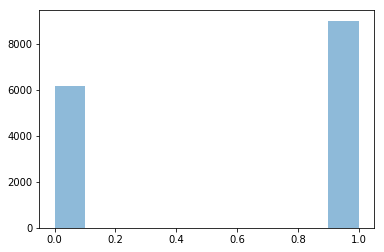

room_type_private_room


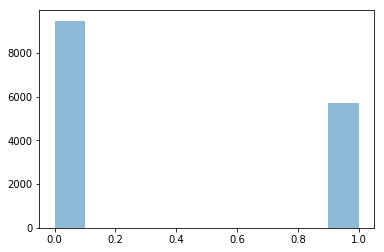

room_type_shared_room


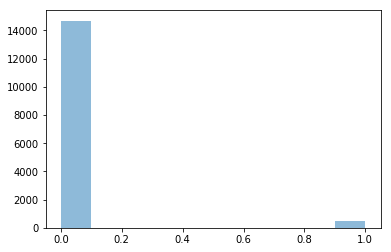

neighbourhood_cleansed_bayview


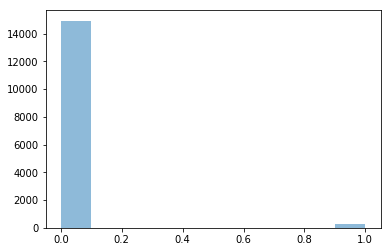

In [15]:
import matplotlib.pyplot as plt
for c in data.columns[:10]:
    if 'id' != c:
        print c
        lst = list(data[c].fillna('0'))
        plt.hist(lst, bins=10, alpha=0.5)
        plt.show()

bed_type_airbed


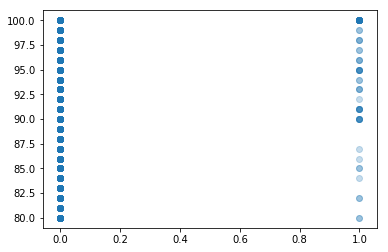

bed_type_couch


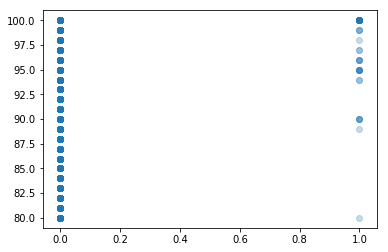

bed_type_futon


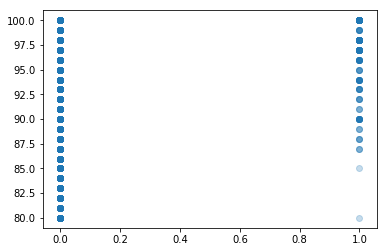

bed_type_pull_out_sofa


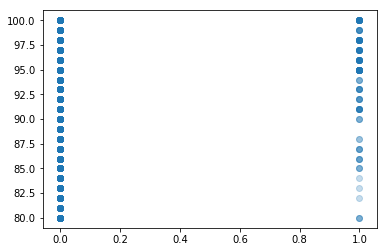

bed_type_real_bed


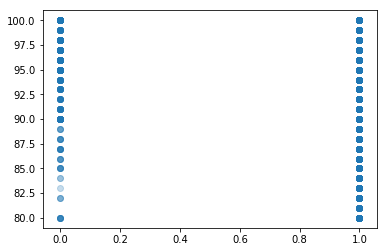

room_type_entire_home_apt


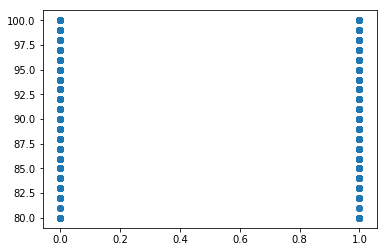

room_type_private_room


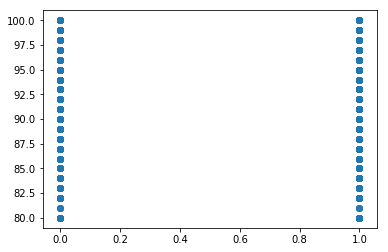

room_type_shared_room


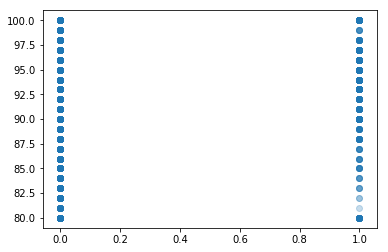

neighbourhood_cleansed_bayview


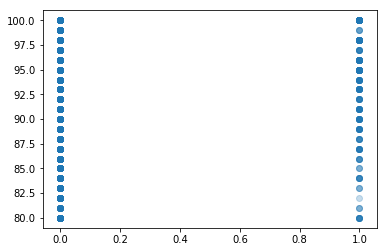

In [16]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].mean())
for c in data.columns[:10]:
    if c not in ['id', dependent_variable]:
        print c
        lst = list(data[c].fillna('0'))
        plt.scatter(lst, y_vals, alpha=0.25)
        plt.show()

In [17]:
# Create the X and y
# Drop the columns that we do not need
y = data[dependent_variable]
X = data.drop(['id', dependent_variable], axis=1)

In [18]:
X.shape

(15170, 98)

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

In [20]:
# Impute missing values using median for both independent and dependent variables

import numpy as np
from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
# imp.fit(X_train)
# X_train = imp.transform(X_train)
# X_test = imp.transform(X_test)

imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imp.fit(y_train)
y_train = imp.transform(y_train.values.reshape(-1,1))
y_train = y_train.ravel()
y_test= imp.transform(y_test.values.reshape(-1,1))
y_test = y_test.ravel()

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(10163, 98)
(10163,)
(5007, 98)
(5007,)


In [21]:
# Scale the independent and dependent variables
# Center the data around zero by subtracting the mean
# Scale it to unit variance
# This is helpful in PCA

from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(y_train.reshape(-1,1))
y_train = scaler.transform(y_train.reshape(-1,1))
y_train = y_train.ravel()
y_test = scaler.transform(y_test.reshape(-1,1))
y_test = y_test.ravel()

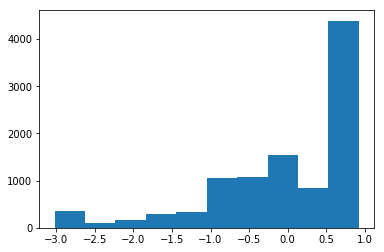

In [22]:
plt.hist(y_train)
plt.show()

In [23]:
# Divide each column by its variance
# y_train = np.log(y_train + 1)
# y_test = np.log(y_test + 1)
# x_train_var = X_train.var(axis=0)
# X_train = X_train / np.sqrt(x_train_var)
# X_test = X_test / np.sqrt(x_train_var)


In [24]:
# Try PCA
# from sklearn.decomposition import PCA, KernelPCA

# pca = PCA(n_components=100)
# X = pca.fit_transform(X)


Mean squared error: 0.95
Variance score: 0.03


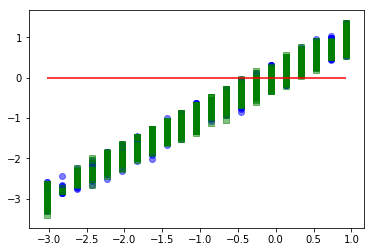

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso(alpha=0.007, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

In [26]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=20, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -2.0971724619980312e+21
<class 'sklearn.linear_model.ridge.Ridge'> 0.05664743635711269
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -0.002231452081670493
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -0.0838641336666643
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> 0.06148689531802608
<class 'sklearn.ensemble.forest.RandomForestRegressor'> 0.0016463094975559477


degree is: 1
Mean squared error: 3988574108006458327040.00
r2 score: -4068108869422624014336.00
explained variance score: -4065691178750517968896.00


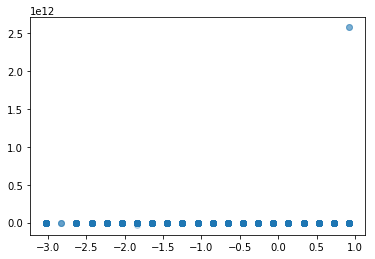

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


degrees = [1, 2]


for d in degrees:

    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False, interaction_only=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # The degree 
    print 'degree is: %s' % d
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))
    
    # Explained variance score: 1 is perfect prediction
    print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
    plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
    plt.show()

In [ ]:
import xgboost


xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, 
                          subsample=0.75, colsample_bytree=0.75, max_depth=7, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()